In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [2]:
# calculate CI using bootstrap
def calculateCI(data,method,n):
    m=int(len(data)/10) #take 10% data
    ms=[]
    for j in range(n): #number of samples
        if method=='mean':
                ms.append(np.mean(np.random.choice(data,m)))
        if method=='median':
                ms.append(np.median(np.random.choice(data,m)))
    a,b=[np.percentile(ms,2.5),np.percentile(ms,97.5)]
    return a,b

In [3]:
path1 = r'E:\netData\MAG\MAG Nobel\2 Nobelpapers\1M NobelCitingpapers.zip'
path2 = r'E:\netData\MAG\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path3 = r'E:\netData\MAG\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'

In [4]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [5]:
f1['Nobelyear'] = f1['Nobel'].map(f2.set_index('paperid')['paperyear'])
f1['gap'] = f1['paperyear'] - f1['Nobelyear']
f1['type'] = f1['type'].map({'CC':'CCP','DC':'DCP'})

In [6]:
f1['Field'] = f1['Nobel'].map(f2.set_index('paperid')['Field'])
f11 = f1[f1['Field'] == 'Physics']
f12 = f1[f1['Field'] == 'Chemistry']
f13 = f1[f1['Field'] == 'Medicine']

# FIG 3

In [25]:
f11D = f11[f11['type']=='DCP']
f12D = f12[f12['type']=='DCP']
f13D = f13[f13['type']=='DCP']
f11C = f11[f11['type']=='CCP']
f12C = f12[f12['type']=='CCP']
f13C = f13[f13['type']=='CCP']

In [26]:
def getmeanCI(ff):
    meanlstD1 = []
    CIlstD1 = []
    D1dlst = []
    for gap in range(30):
        f11DD = ff[ff['gap']==gap]
        Af11D = f11DD.groupby(f11DD['Nobel']).count().reset_index()['paperid'].values
        mean0 = np.mean(Af11D)
        CI0 = calculateCI(Af11D,'mean',1000)[0]
        meanlstD1.append(mean0)
        CIlstD1.append(mean0-CI0)
        D1dlst.append(Af11D)
    return D1dlst , meanlstD1,CIlstD1

In [27]:
D1, meanlst1D,CIlst1D = getmeanCI(f11D)
D2, meanlst2D,CIlst2D = getmeanCI(f12D)
D3, meanlst3D,CIlst3D = getmeanCI(f13D)
C1, meanlst1C,CIlst1C = getmeanCI(f11C)
C2, meanlst2C,CIlst2C = getmeanCI(f12C)
C3, meanlst3C,CIlst3C = getmeanCI(f13C)

In [28]:
meanD = [meanlst1D,meanlst2D,meanlst3D]
meanC = [meanlst1C,meanlst2C,meanlst3C]

CID = [CIlst1D,CIlst2D,CIlst3D]
CIC = [CIlst1C,CIlst2C,CIlst3C]

dD = [D1,D2,D3]
dC = [C1,C2,C3]

In [12]:
clst = ["#154360","#E67E22"]
glst = [18.2,16,16.7]

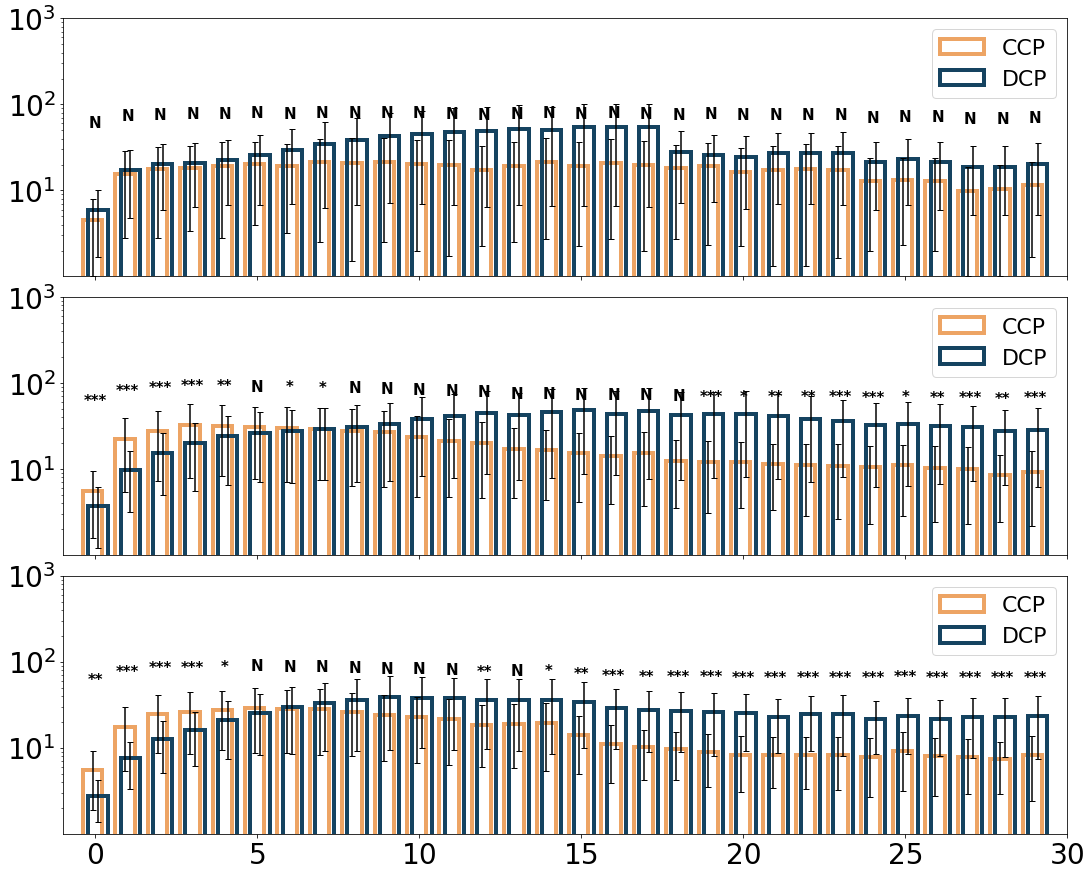

In [39]:
plt.subplots(3,1,figsize=(18,15),sharex=True,sharey=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0.08)
for _ in range(3):
    ax = plt.subplot(3,1,_ + 1)
    plt.bar(np.array(range(30))-.08,meanC[_],edgecolor = clst[1], yerr=CIC[_],align='center',capsize=3,linewidth = 4,fill = False,alpha = 0.7,width=0.6,label = 'CCP')
    plt.bar(np.array(range(30))+.08,meanD[_],edgecolor = clst[0], yerr=CID[_],align='center',capsize=3,linewidth = 4,fill = False,alpha = 1,width=0.6,label = 'DCP')
    plt.xlim(-1,30)
    plt.ylim(1,1000)
    ax.set_yscale("log")
    plt.yticks([10e0,10e1,10e2],size = 28)
    plt.xticks(size = 28)
    plt.legend(fontsize = 22,loc='upper right')
    plt.ylabel('',fontsize = 0)
    plt.xlabel('',fontsize = 0)
    for i in range(30):
        p = scipy.stats.mannwhitneyu(dD[_][i] , dC[_][i], alternative='two-sided').pvalue
        if p>0.1:
            plt.text(i , meanC[_][i]+50, 'N', fontsize=15, ha='center', fontweight='bold')
        elif p>0.05:
            plt.text(i , meanC[_][i]+50, '*', fontsize=15, ha='center', fontweight='bold')
        elif p>0.01:
            plt.text(i , meanC[_][i]+50, '**', fontsize=15, ha='center', fontweight='bold')
        else:
            plt.text(i , meanC[_][i]+50, '***', fontsize=15, ha='center', fontweight='bold')
    
    
    
plt.savefig(r'G:\A J YANG PAPER\Working paper (under review)\IPM Disruptive and consolidating Citing Papers\2\fig\fig 3\1.pdf',bbox_inches = 'tight')

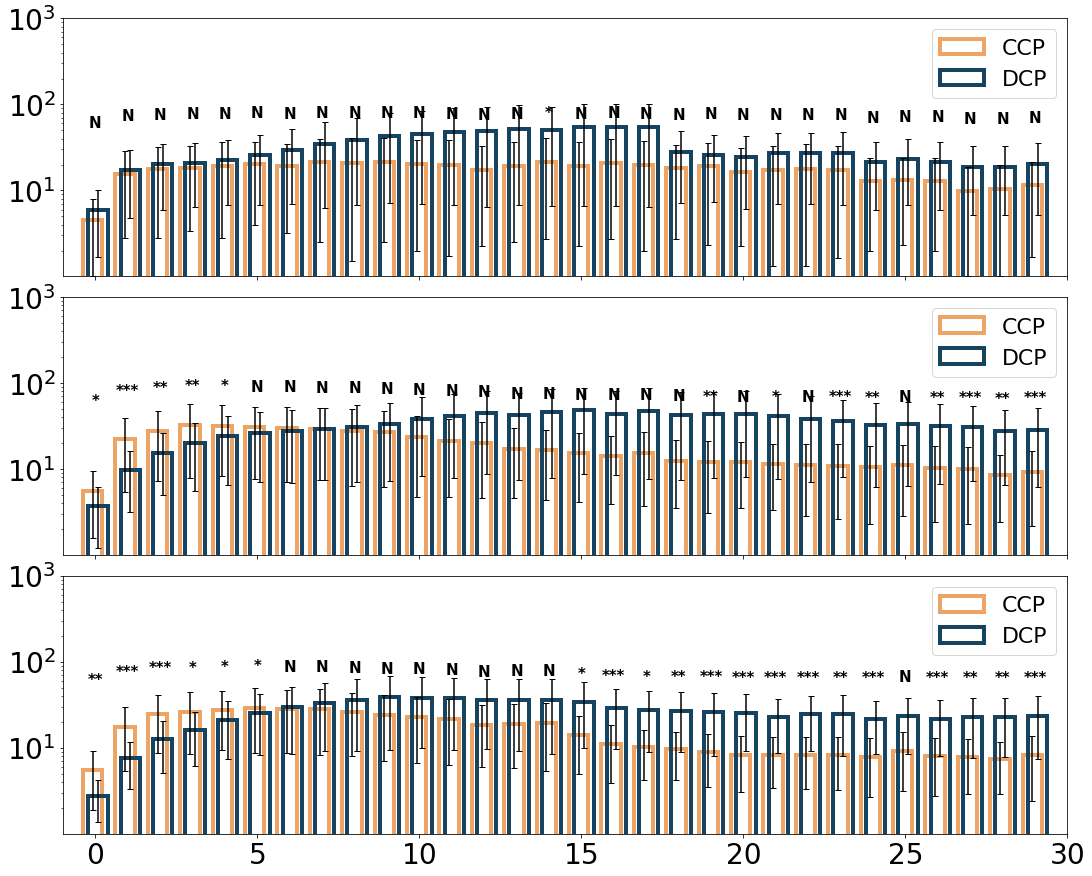

In [40]:
plt.subplots(3,1,figsize=(18,15),sharex=True,sharey=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0.08)
for _ in range(3):
    ax = plt.subplot(3,1,_ + 1)
    plt.bar(np.array(range(30))-.08,meanC[_],edgecolor = clst[1], yerr=CIC[_],align='center',capsize=3,linewidth = 4,fill = False,alpha = 0.7,width=0.6,label = 'CCP')
    plt.bar(np.array(range(30))+.08,meanD[_],edgecolor = clst[0], yerr=CID[_],align='center',capsize=3,linewidth = 4,fill = False,alpha = 1,width=0.6,label = 'DCP')
    plt.xlim(-1,30)
    plt.ylim(1,1000)
    ax.set_yscale("log")
    plt.yticks([10e0,10e1,10e2],size = 28)
    plt.xticks(size = 28)
    plt.legend(fontsize = 22,loc='upper right')
    plt.ylabel('',fontsize = 0)
    plt.xlabel('',fontsize = 0)
    for i in range(30):
        p = scipy.stats.kstest(dD[_][i] , dC[_][i], alternative='two-sided').pvalue
        if p>0.1:
            plt.text(i , meanC[_][i]+50, 'N', fontsize=15, ha='center', fontweight='bold')
        elif p>0.05:
            plt.text(i , meanC[_][i]+50, '*', fontsize=15, ha='center', fontweight='bold')
        elif p>0.01:
            plt.text(i , meanC[_][i]+50, '**', fontsize=15, ha='center', fontweight='bold')
        else:
            plt.text(i , meanC[_][i]+50, '***', fontsize=15, ha='center', fontweight='bold')
    
    
    
# plt.savefig(r'G:\A J YANG PAPER\Working paper (under review)\IPM Disruptive and consolidating Citing Papers\2\fig\fig 3\1.pdf',bbox_inches = 'tight')

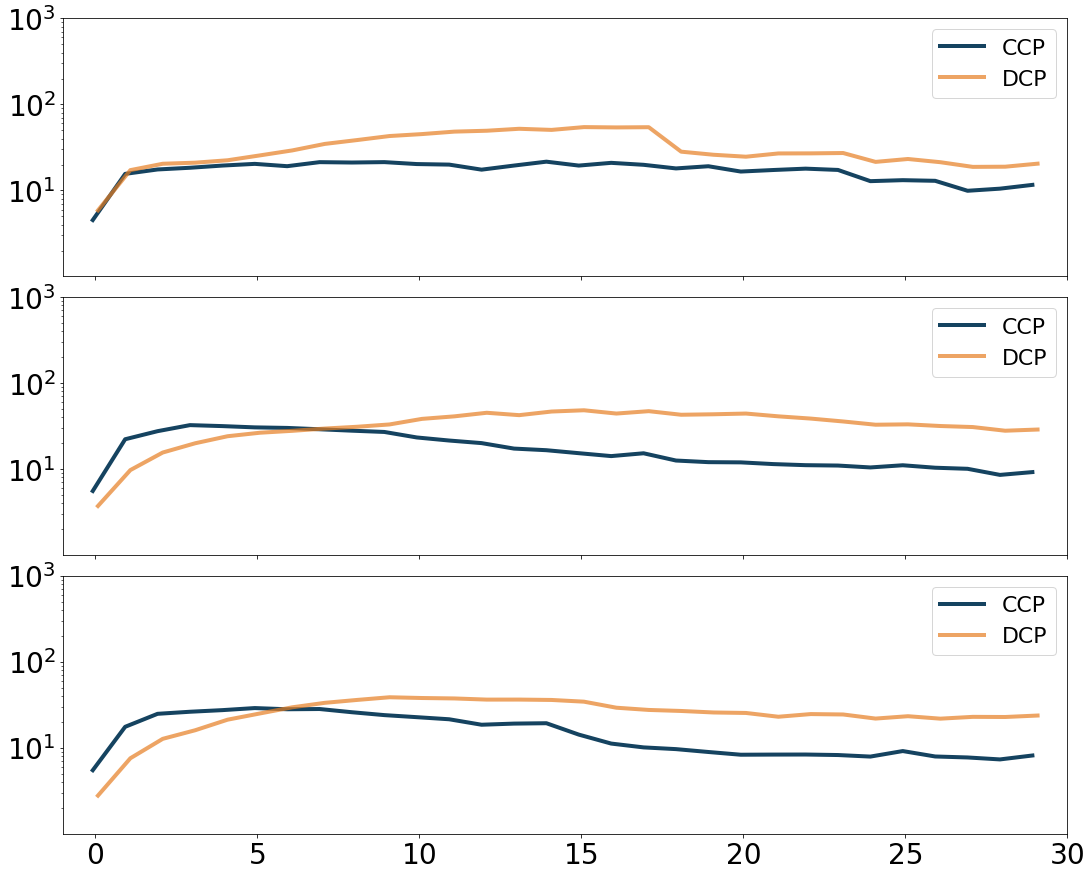

In [23]:
plt.subplots(3,1,figsize=(18,15),sharex=True,sharey=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0,hspace=0.08)
for _ in range(3):
    ax = plt.subplot(3,1,_ + 1)
    plt.plot(np.array(range(30))-.08,meanC[_],color = clst[0],linewidth = 4,alpha = 1  ,label = 'CCP')
    plt.plot(np.array(range(30))+.08,meanD[_],color = clst[1],linewidth = 4,alpha = 0.7,label = 'DCP')
    plt.xlim(-1,30)
    plt.ylim(1,1000)
    ax.set_yscale("log")
    plt.yticks([10e0,10e1,10e2],size = 28)
    plt.xticks(size = 28)
    plt.legend(fontsize = 22,loc='upper right')
    plt.ylabel('',fontsize = 0)
    plt.xlabel('',fontsize = 0)
# plt.savefig(r'G:\A J YANG PAPER\Working paper (under review)\IPM Disruptive and consolidating Citing Papers\2\fig\fig 3\1.pdf',bbox_inches = 'tight')

In [14]:
??plt.bar